آنالیز میلیاردهای جهان به زبان پایتون

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('Billionaire.csv')
data.head(10)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
5,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,$93 B,United States,software,7,76.0,Technology
7,Larry Page,$91.5 B,United States,Google,8,48.0,Technology
8,Sergey Brin,$89 B,United States,Google,9,47.0,Technology
9,Mukesh Ambani,$84.5 B,India,diversified,10,63.0,Diversified


Preprocessing

قبل از اینکه کار رو شروع کنیم، ببینیم آیا مقادیر خالی یا نال داریم یا نه؟

In [9]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

این ۷۹ نفر رو حذف میکنیم

In [10]:
data = data.dropna()

In [11]:
data.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

Delete B and $ from networth column

In [14]:
data["NetWorth"] = data["NetWorth"].str.strip("$")
data["NetWorth"] = data["NetWorth"].str.strip("B")
data["NetWorth"] = data["NetWorth"].astype(float)

In [15]:
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


Process

In [18]:
df = data.sort_values(by = ["NetWorth"], ascending=False).head(10).reset_index()
df

,index,Name,NetWorth,Country,Source,Rank,Age,Industry
0,0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
5,5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,6,Larry Ellison,93.0,United States,software,7,76.0,Technology
7,7,Larry Page,91.5,United States,Google,8,48.0,Technology
8,8,Sergey Brin,89.0,United States,Google,9,47.0,Technology
9,9,Mukesh Ambani,84.5,India,diversified,10,63.0,Diversified


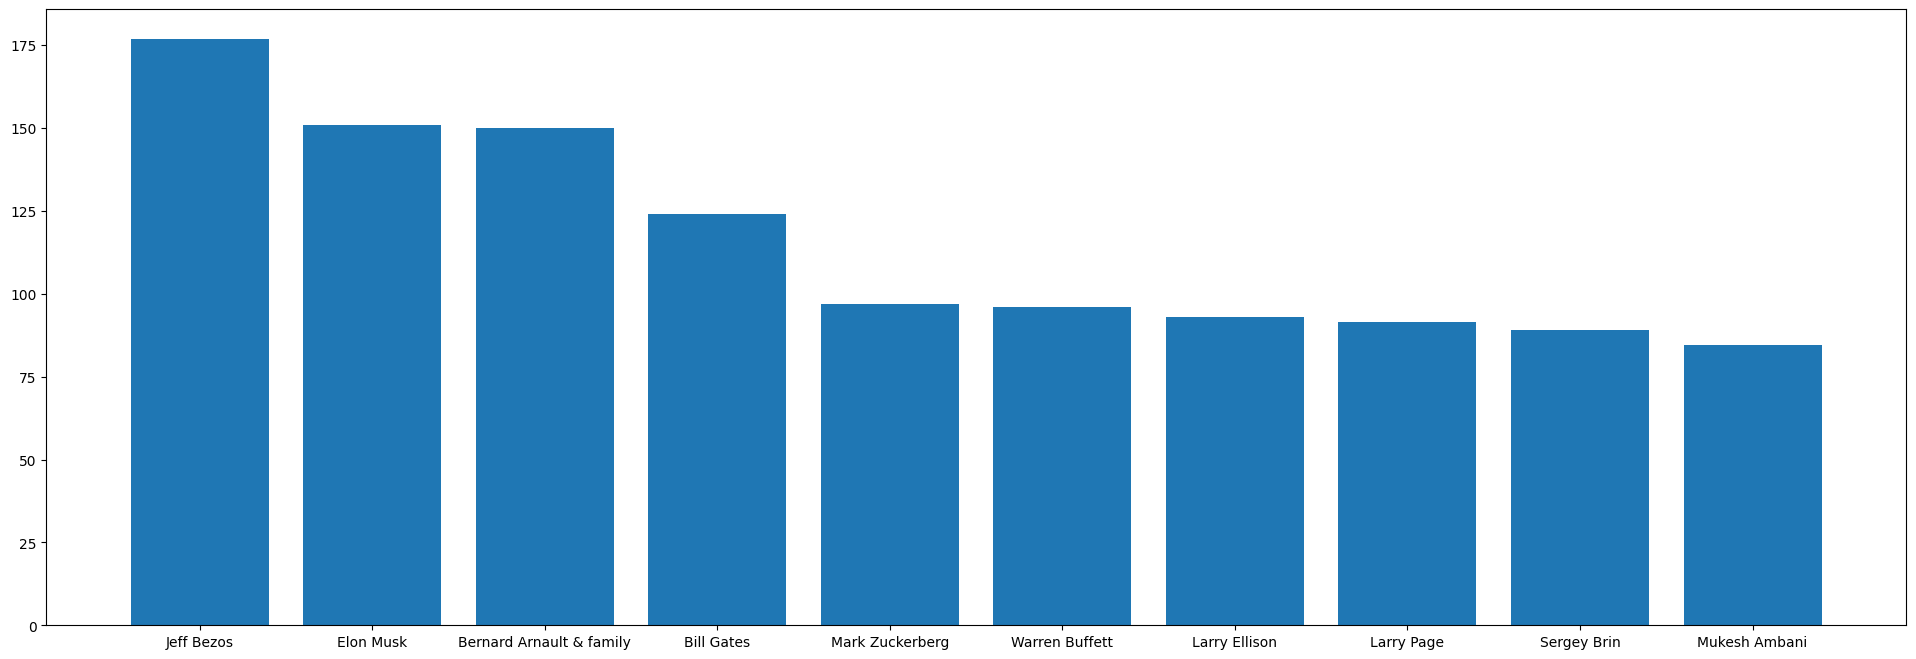

In [21]:
plt.figure(figsize=(24, 8))
plt.bar(df["Name"], df["NetWorth"])
plt.show()

In [22]:
df = data["Source"].value_counts().head(10).reset_index()
df

,Source,count
0,real estate,169
1,pharmaceuticals,96
2,investments,89
3,diversified,78
4,software,61
5,retail,44
6,hedge funds,42
7,private equity,35
8,consumer goods,32
9,chemicals,32


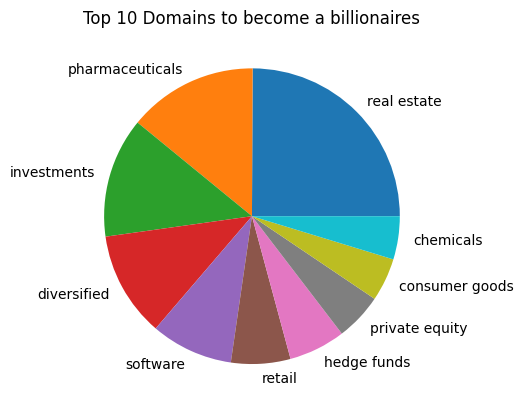

In [24]:
plt.pie(df["count"], labels=df["Source"])
plt.title("Top 10 Domains to become a billionaires")
plt.show()

In [27]:
df = data["Industry"].value_counts().reset_index()
df

,Industry,count
0,Finance & Investments,365
1,Technology,355
2,Manufacturing,317
3,Fashion & Retail,268
4,Healthcare,213
5,Real Estate,211
6,Food & Beverage,204
7,Diversified,180
8,Energy,99
9,Media & Entertainment,92


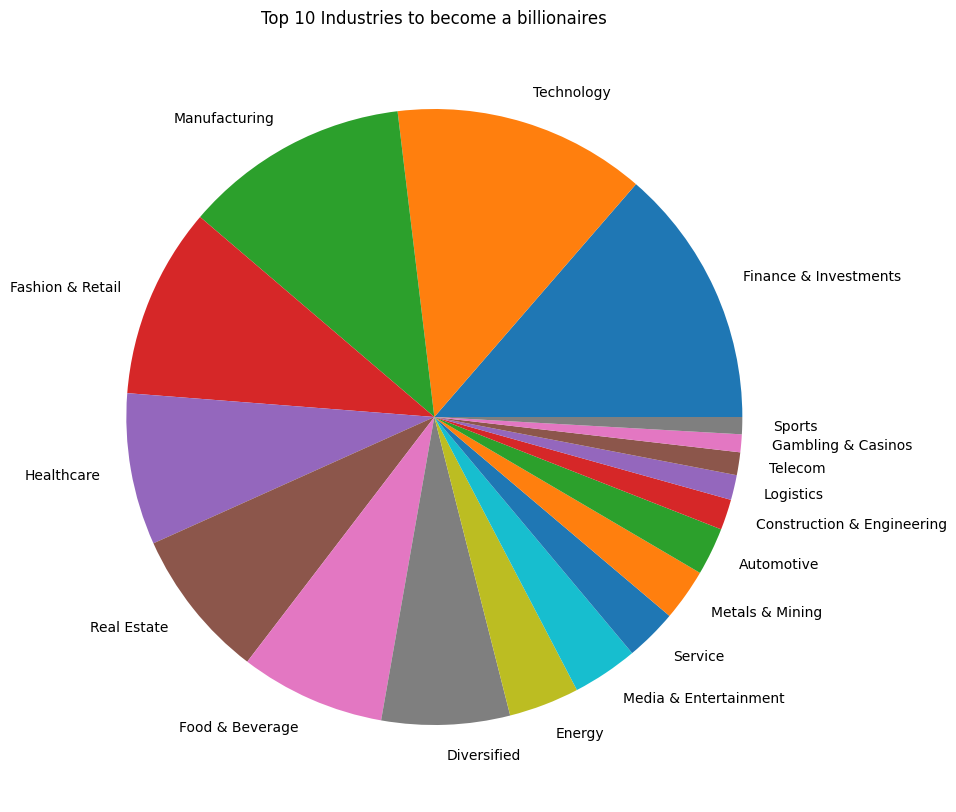

In [31]:
plt.figure(figsize=(24, 10))
plt.pie(df["count"], labels=df["Industry"])
plt.title("Top 10 Industries to become a billionaires")
plt.show()

In [32]:
df = data["Country"].value_counts().head().reset_index()
df

,Country,count
0,United States,720
1,China,610
2,India,134
3,Russia,118
4,Germany,115


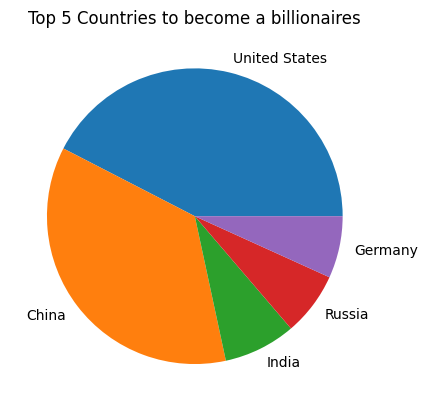

In [33]:
plt.pie(df["count"], labels=df["Country"])
plt.title("Top 5 Countries to become a billionaires")
plt.show()